<a href="https://colab.research.google.com/github/shretimag/fintech/blob/main/indicators_study_microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

Extraction of Past Data:-

---
The company chosen for this task is Microsoft and it goes with the ticker symbol -'MSFT'.


In [ ]:
micros=yf.Ticker("MSFT")
micros.info
micros.history(period="1y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-30 00:00:00-05:00,242.360996,243.441427,240.071301,240.576828,25867400,0.0,0.0
2023-01-31 00:00:00-05:00,241.310323,245.770773,240.814718,245.632004,26541100,0.0,0.0
2023-02-01 00:00:00-05:00,245.820327,252.937215,243.312565,250.528580,31259900,0.0,0.0
2023-02-02 00:00:00-05:00,256.545276,262.363680,254.989067,262.274475,39940400,0.0,0.0
2023-02-03 00:00:00-05:00,257.258889,261.877936,254.840332,256.079346,29077300,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-23 00:00:00-05:00,395.750000,399.380005,393.929993,398.899994,20525900,0.0,0.0
2024-01-24 00:00:00-05:00,401.540009,405.630005,400.450012,402.559998,24867000,0.0,0.0
2024-01-25 00:00:00-05:00,404.320007,407.010010,402.529999,404.869995,21021200,0.0,0.0


Keeping the necessary data:-

In [ ]:
micros_newdata=micros.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
print(micros_newdata)

                                 Open        High         Low       Close
Date                                                                     
2023-01-30 00:00:00-05:00  242.361011  243.441443  240.071316  240.576843
2023-01-31 00:00:00-05:00  241.310323  245.770773  240.814718  245.632004
2023-02-01 00:00:00-05:00  245.820342  252.937231  243.312580  250.528595
2023-02-02 00:00:00-05:00  256.545246  262.363650  254.989037  262.274445
2023-02-03 00:00:00-05:00  257.258920  261.877967  254.840362  256.079376
...                               ...         ...         ...         ...
2024-01-23 00:00:00-05:00  395.750000  399.380005  393.929993  398.899994
2024-01-24 00:00:00-05:00  401.540009  405.630005  400.450012  402.559998
2024-01-25 00:00:00-05:00  404.320007  407.010010  402.529999  404.869995
2024-01-26 00:00:00-05:00  404.369995  406.170013  402.429993  403.929993
2024-01-29 00:00:00-05:00  406.059998  409.980011  404.329987  409.720001

[251 rows x 4 columns]


Simple Moving Average (SMA) Calculation

                                Close       SMA20
Date                                             
2023-01-30 00:00:00-05:00  240.576843         NaN
2023-01-31 00:00:00-05:00  245.632004         NaN
2023-02-01 00:00:00-05:00  250.528595         NaN
2023-02-02 00:00:00-05:00  262.274445         NaN
2023-02-03 00:00:00-05:00  256.079376         NaN
...                               ...         ...
2024-01-23 00:00:00-05:00  398.899994  376.152960
2024-01-24 00:00:00-05:00  402.559998  377.004971
2024-01-25 00:00:00-05:00  404.869995  377.723947
2024-01-26 00:00:00-05:00  403.929993  378.483801
2024-01-29 00:00:00-05:00  409.720001  379.287802

[251 rows x 2 columns]


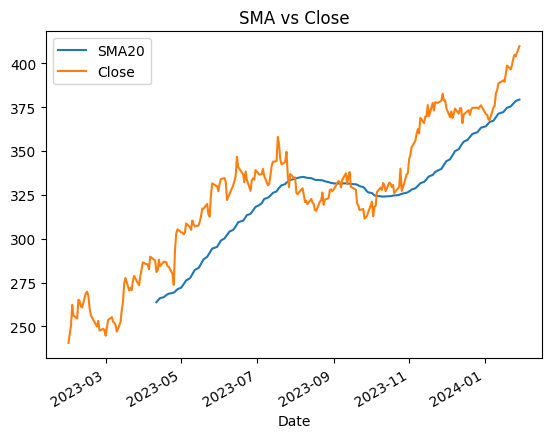

In [ ]:
micros_sma=micros_newdata
micros_sma=micros_sma['Close'].to_frame()
micros_sma['SMA20']=micros_sma.rolling(50).mean()
micros_sma[['SMA20', 'Close']].plot(title="SMA vs Close")
print (micros_sma)

Exponential Moving Average (EMA) Calculation

                                Close       EMA20
Date                                             
2023-01-30 00:00:00-05:00  240.576843  240.576843
2023-01-31 00:00:00-05:00  245.632004  243.230803
2023-02-01 00:00:00-05:00  250.528595  245.910508
2023-02-02 00:00:00-05:00  262.274445  250.634524
2023-02-03 00:00:00-05:00  256.079376  251.951587
...                               ...         ...
2024-01-23 00:00:00-05:00  398.899994  384.440148
2024-01-24 00:00:00-05:00  402.559998  386.165848
2024-01-25 00:00:00-05:00  404.869995  387.947195
2024-01-26 00:00:00-05:00  403.929993  389.469366
2024-01-29 00:00:00-05:00  409.720001  391.397998

[251 rows x 2 columns]


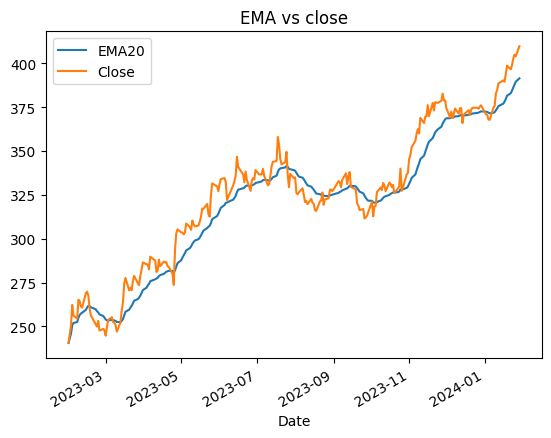

In [ ]:
micros_ema=micros_newdata
micros_ema=micros_ema['Close'].to_frame()
micros_ema['EMA20']=micros_ema.ewm(span=20).mean()
micros_ema[['EMA20','Close']].plot(title="EMA vs close")
print(micros_ema)

Price Data Extraction for RSI

In [ ]:
price_data=yf.download('MSFT',start="2023-03-03",end="2024-01-01")['Close']
print(price_data)

[*********************100%%**********************]  1 of 1 completed

Date
2023-03-03    255.289993
2023-03-06    256.869995
2023-03-07    254.149994
2023-03-08    253.699997
2023-03-09    252.320007
                 ...    
2023-12-22    374.579987
2023-12-26    374.660004
2023-12-27    374.070007
2023-12-28    375.279999
2023-12-29    376.040009
Name: Close, Length: 209, dtype: float64


Relative Strength Index (RSI) Calculation

In [ ]:
def RSIcalc(price_data):
 final_price=price_data.diff()
 gain=final_price.where(final_price>0,0)
 loss=-final_price.where(final_price<0,0)
 avg_gain=gain.rolling(window=14).mean()
 avg_loss=loss.rolling(window=14).mean()
 rs=avg_gain/avg_loss
 rsi=100-(100/(1+rs))
 return rsi
 RSIcalc[['rsi','Close']].plot(title="rsi vs close")
print(RSIcalc(price_data))


Date
2023-03-03          NaN
2023-03-06          NaN
2023-03-07          NaN
2023-03-08          NaN
2023-03-09          NaN
                ...    
2023-12-22    56.647070
2023-12-26    52.844242
2023-12-27    57.639899
2023-12-28    56.453020
2023-12-29    52.916520
Name: Close, Length: 209, dtype: float64


Moving Average Convergence/Divergence (MACD) Calculation

                                Close      MACD
Date                                           
2023-01-30 00:00:00-05:00  240.576843  0.000000
2023-01-31 00:00:00-05:00  245.632004  0.113417
2023-02-01 00:00:00-05:00  250.528595  0.296359
2023-02-02 00:00:00-05:00  262.274445  0.796381
2023-02-03 00:00:00-05:00  256.079376  0.804803
...                               ...       ...
2024-01-23 00:00:00-05:00  398.899994  7.096317
2024-01-24 00:00:00-05:00  402.559998  7.652801
2024-01-25 00:00:00-05:00  404.869995  8.185855
2024-01-26 00:00:00-05:00  403.929993  8.435218
2024-01-29 00:00:00-05:00  409.720001  8.996340

[251 rows x 2 columns]


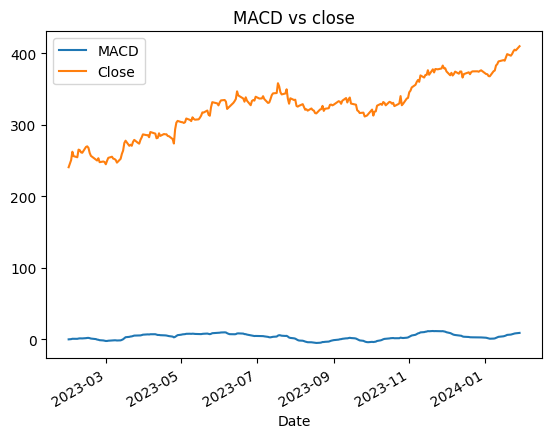

In [ ]:
micro_macd=micros_newdata
micro_macd=micro_macd['Close'].to_frame()
micro_macd["MACD"]=micro_macd.ewm(span=12).mean()-micro_macd.ewm(span=26).mean()
micro_macd[['MACD','Close']].plot(title="MACD vs close")
print(micro_macd)

Bollinger Bands Calculation

                                 Open        High         Low       Close  \
Date                                                                        
2023-01-30 00:00:00-05:00  242.361011  243.441443  240.071316  240.576843   
2023-01-31 00:00:00-05:00  241.310323  245.770773  240.814718  245.632004   
2023-02-01 00:00:00-05:00  245.820342  252.937231  243.312580  250.528595   
2023-02-02 00:00:00-05:00  256.545246  262.363650  254.989037  262.274445   
2023-02-03 00:00:00-05:00  257.258920  261.877967  254.840362  256.079376   
...                               ...         ...         ...         ...   
2024-01-23 00:00:00-05:00  395.750000  399.380005  393.929993  398.899994   
2024-01-24 00:00:00-05:00  401.540009  405.630005  400.450012  402.559998   
2024-01-25 00:00:00-05:00  404.320007  407.010010  402.529999  404.869995   
2024-01-26 00:00:00-05:00  404.369995  406.170013  402.429993  403.929993   
2024-01-29 00:00:00-05:00  406.059998  409.980011  404.329987  409.720001   

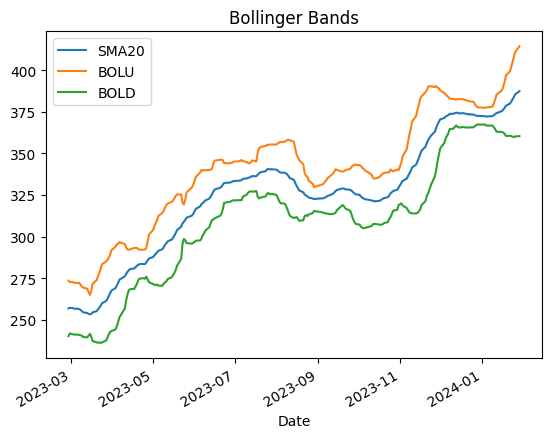

In [ ]:
micros_bolb=micros_newdata
micros_bolb=micros_newdata['Close'].to_frame()
micros_bolb=micros_newdata.assign(SMA20=micros_bolb.rolling(20).mean(),
                              BOLU=micros_bolb.rolling(20).mean()+2*micros_bolb.rolling(20).std(),
                              BOLD=micros_bolb.rolling(20).mean()-2*micros_bolb.rolling(20).std())
micros_bolb[['SMA20','BOLU','BOLD']].plot(title="Bollinger Bands")
print(micros_bolb)